# Installing MAGEMin and running calculations through python

First make sure you have a local installation of Julia on your computer. In some cases we've found that uninstalling and then reinstalling Julia can help if you are getting errors trying to run MAGEMin through PetThermoTools.

To install Julia go to this webpage: "https://julialang.org/downloads/#current_stable_release" and download the .exe (Windows) or .dmg (MacOS) file depending on your operating system. You can also install Julia via the command line/terminal, but I've come across more issues when trying to link Python and Julia when Julia is installed via the terminal.

Once Julia is installed open the Julia App and run the following code:

using Pkg

Pkg.add("PyCall")

Pkg.add(name="MAGEMin_C", version="1.5.9")

Pkg.add(url="https://github.com/gleesonm1/MAGEMinCalc")

Once this has been done close and restart your Python environment and then run the code below:

#### First install the pyMAGEMINcalc code - this connects PetThermoTools to MAGEMin

In [ ]:
%pip install "https://github.com/gleesonm1/pyMAGEMINcalc/archive/refs/tags/v0.0.8.zip"

#### Then make sure pyjulia is installed in your python environment

In [ ]:
%pip install julia

#### Next update pyjulia to make sure it can find all the Julia packages your previously installed.  MacOS users will have to run all 4 lines every time you want to run MAGEMin calculations (i.e., every time you restart the kernel). Windows users only need to run the first 2 lines and only when you have updated packages etc. in Julia.

In [7]:
### If using MacOS copy these 4 lines into every notebook where you are running MAGEMin calculations ###
import julia
julia.install()
from julia.api import Julia ### COMMENT THIS LINE IF ON WINDOWS ###
jl = Julia(compiled_modules=False) ### COMMENT THIS LINE IF ON WINDOWS ###

[ Info: Julia version info


Julia Version 1.9.3
Commit bed2cd540a1 (2023-08-24 14:43 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: macOS (arm64-apple-darwin22.4.0)
  uname: Darwin 23.6.0 Darwin Kernel Version 23.6.0: Mon Jul 29 21:16:46 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T8112 arm64 arm
  CPU: Apple M2: 
              speed         user         nice          sys         idle          irq
       #1  2400 MHz     556369 s          0 s     325174 s    1881198 s          0 s
       #2  2400 MHz     516926 s          0 s     297271 s    1950338 s          0 s
       #3  2400 MHz     461870 s          0 s     262928 s    2042694 s          0 s
       #4  2400 MHz     418521 s          0 s     233623 s    2118343 s          0 s
       #5  2400 MHz     222946 s          0 s      88890 s    2468167 s          0 s
       #6  2400 MHz     147739 s          0 s      48808 s    2585332 s          0 s
       #7  2400 MHz      95050 s          0 s      27118 s    2660946 s          

[ Info: Julia executable: /Applications/Julia-1.9.app/Contents/Resources/julia/bin/julia
[ Info: Trying to import PyCall...
┌ Info: PyCall is already installed and compatible with Python executable.
│ 
│ PyCall:
│     python: /Users/gleesonm/anaconda3/bin/python
│     libpython: /Users/gleesonm/anaconda3/lib/libpython3.11.dylib
│ Python:
│     python: /Users/gleesonm/anaconda3/bin/python
└     libpython: 


#### Finally test the MAGEMIN/Julia installation, if everything has gone to plan an adiabatic decompression melting model should run below

In [1]:
import PetThermoTools as ptt 
Melting = ptt.AdiabaticDecompressionMelting(Model="Holland")

Using libMAGEMin.dylib from MAGEMin_jll
0.1301584141743144
30.029.829.629.429.229.028.828.628.428.228.027.827.627.427.227.026.826.626.426.226.025.825.625.425.225.024.824.624.424.224.023.823.623.423.223.022.822.622.422.222.021.821.621.421.221.020.820.620.420.220.019.819.619.419.219.018.818.618.418.218.017.817.617.417.217.016.816.616.416.216.015.815.615.415.215.014.814.614.414.214.013.813.613.413.213.012.812.612.412.212.011.811.611.411.211.010.810.610.410.210.09.89.69.49.29.08.88.68.48.28.07.87.67.47.27.06.86.66.46.26.05.85.65.45.25.04.84.64.44.24.03.83.63.43.23.02.82.62.42.22.0

(40000.0, 0.0)

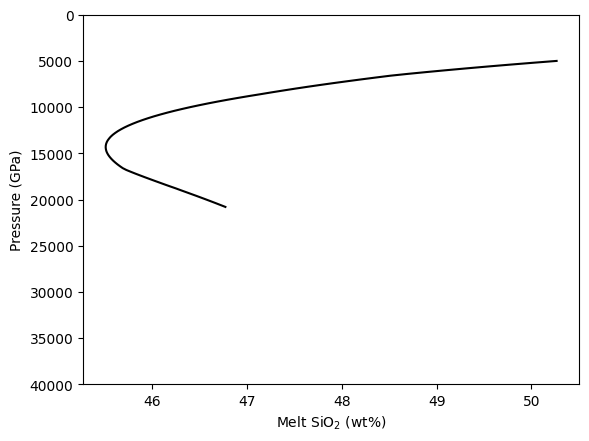

In [12]:
import matplotlib.pyplot as plt
plt.plot(Melting['All']['SiO2_Liq'], Melting['All']['P_bar'], '-k')
plt.xlabel('Melt SiO$_2$ (wt%)')
plt.ylabel('Pressure (GPa)')
plt.ylim([40000,0])